<a href="https://colab.research.google.com/github/amsha16/MachineLearningTF/blob/master/7_WIneQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import useful libraries for reading data, preprocessing and classification
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks

import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
# Read data
redWineData = pd.read_csv("winequality-red.csv", sep=';')
whiteWineData = pd.read_csv("winequality-white.csv", sep=';')

In [132]:
redWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [133]:
# Show the different quality labels
redWineData['quality'].unique()

array([5, 6, 7, 4, 8, 3])

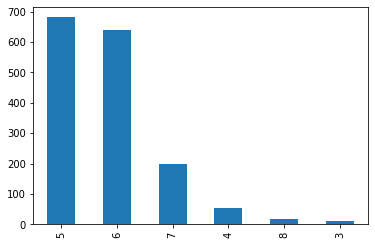

In [134]:
# Show the count of each quality 
redWineData['quality'].value_counts().plot(kind='bar')

In [0]:
# Separate input features
X = redWineData.iloc[:,:11]

In [136]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [0]:
#Label
Y = redWineData['quality']

In [0]:
# Split the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25,random_state = 5 )

In [0]:
# Scale the input features to a range between 0 and 1
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [0]:
scaler1 = preprocessing.MinMaxScaler()
X_test = scaler.fit_transform(X_test)

In [139]:
Y_train.value_counts()

5    502
6    490
7    146
4     42
8     11
3      8
Name: quality, dtype: int64

In [140]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1199, 11), (1199,), (400, 11), (400,))

In [0]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [0]:
NUM_EPOCHS = 500

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mse','mae'])

In [143]:
hist = model.fit(X_train,Y_train , epochs=NUM_EPOCHS, batch_size=32, verbose=1,validation_split=0.25, validation_data =(X_test, Y_test),workers=0)

Epoch 1/500
29/29 [==============================] - 1s 21ms/step - loss: 9.7285 - mse: 9.7285 - mae: 1.7104 - val_loss: 3.5907 - val_mse: 3.5907 - val_mae: 1.4962
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 1.8209 - mse: 1.8209 - mae: 0.9431 - val_loss: 1.3959 - val_mse: 1.3959 - val_mae: 0.9264
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 2.1451 - mse: 2.1451 - mae: 1.1229 - val_loss: 5.4284 - val_mse: 5.4284 - val_mae: 1.8223
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 1.5973 - mse: 1.5973 - mae: 0.9447 - val_loss: 10.9985 - val_mse: 10.9985 - val_mae: 2.7649
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 2.0909 - mse: 2.0909 - mae: 1.0981 - val_loss: 0.5769 - val_mse: 0.5769 - val_mae: 0.6009
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 1.4842 - mse: 1.4842 - mae: 0.8918 - val_loss: 6.9924 - val_mse: 6.9924 - val_mae: 2.1516
Epoch 7/500
29/29 [

In [0]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)

In [145]:
example_result

array([[5.941637 ],
       [6.4519386],
       [6.5498   ],
       [5.8054852],
       [6.4739957],
       [6.177969 ],
       [5.0585136],
       [4.6004624],
       [5.0827827],
       [5.0693026]], dtype=float32)

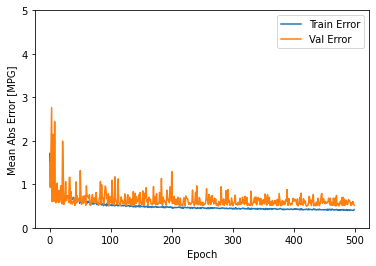

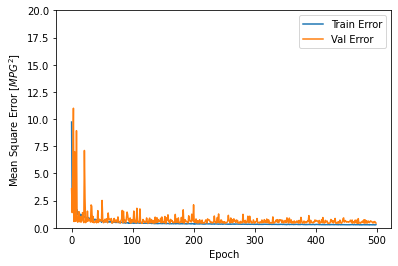

In [146]:
# Plot History

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
    
plot_history(hist)

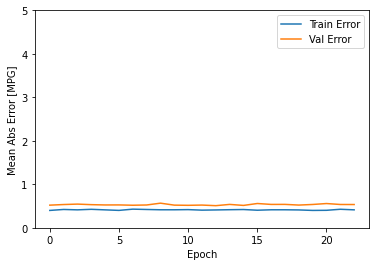

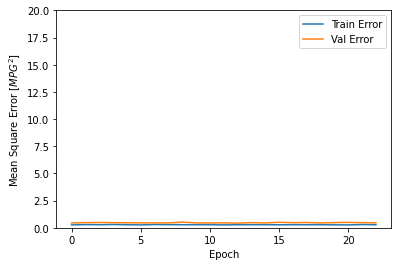

In [147]:
# Let's update the model.fit call to automatically stop training when the validation score doesn't improve.

# The patience parameter is the amount of epochs to check for improvement
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, epochs=50,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [148]:
loss, mae, mse = model.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} quality".format(mae))

13/13 - 0s - loss: 0.4774 - mse: 0.4774 - mae: 0.5338
Testing set Mean Abs Error:  0.48 quality


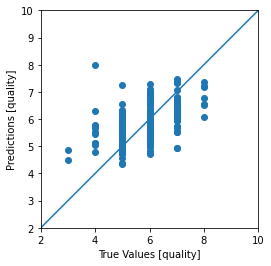

In [149]:

Y_prediction = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, Y_prediction)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [2, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

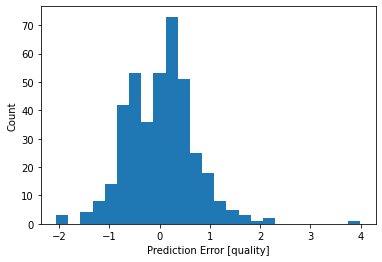

In [150]:
error = Y_prediction - Y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [quality]")
_ = plt.ylabel("Count")


Predictions By Example


In [0]:
# pick samples
i = 10
example_batch = X_test[:i]
example_test_labels = Y_test[:i]

In [152]:
example_batch

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
236,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0
833,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9
424,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9
1155,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
412,7.1,0.735,0.16,1.9,0.100,15.0,77.0,0.99660,3.27,0.64,9.3
419,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9
1098,8.0,0.310,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5
1414,10.0,0.320,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6
994,10.0,0.350,0.45,2.5,0.092,20.0,88.0,0.99918,3.15,0.43,9.4


In [153]:
example_test_labels

array([6, 4, 5, 6, 5, 5, 5, 7, 5, 5])

In [154]:
# prediction
example_result = model.predict(example_batch)
example_result

array([[5.4130416],
       [5.129445 ],
       [5.258208 ],
       [6.594599 ],
       [5.5677857],
       [5.197502 ],
       [4.7868876],
       [6.6802435],
       [5.5650897],
       [5.309025 ]], dtype=float32)

In [156]:
# More accurate results
# rounding options (int, np.rint, np.ceil)

for j in np.arange(len(example_result)):
    if np.floor(example_result[j]) != np.array(example_test_labels)[j]:
        print('miss classification')
    else:
        print('Correct prediction')

miss classification
miss classification
Correct prediction
Correct prediction
Correct prediction
Correct prediction
miss classification
miss classification
Correct prediction
Correct prediction
